## IMPORTS

In [1]:
import argparse
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import pickle

In [5]:
fCNTRL = 'f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.REGRESS_MJO_TS_PRECT_MCBOT.nc'
dirCNTRL = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts//mjo_diag//'

fMEAN  = 'f.e.FTORCHmjo_MEANmjo_DT.cam.h1.REGRESS_MJO_TS_PRECT_MCBOT.nc'
dirMEAN = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo_DT/ts//mjo_diag//'

fCNN  = 'f.e.FTORCHmjo_CNNmjo_DT.cam.h1.REGRESS_MJO_TS_PRECT_MCBOT.nc'
dirCNN = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo_DT/ts//mjo_diag//'


fFULL  = 'f.e.FTORCHmjo_fullCNN_DT.cam.h1.REGRESS_MJO_TS_PRECT_MCBOT.nc'
dirFULL = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_fullCNN_DT/ts//mjo_diag//'



dsCNTRL = xr.open_dataset(os.path.join(dirCNTRL, fCNTRL))
dsMEAN = xr.open_dataset(os.path.join(dirMEAN, fMEAN))
dsCNN = xr.open_dataset(os.path.join(dirCNN, fCNN))
dsFULL = xr.open_dataset(os.path.join(dirFULL, fFULL))

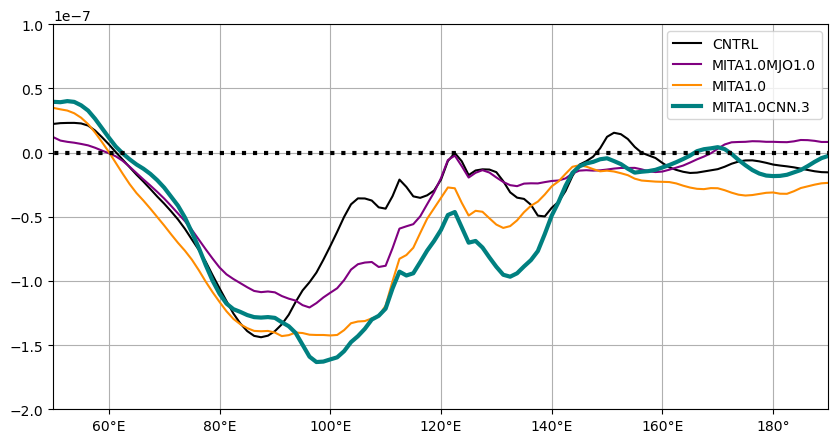

In [67]:
fig = plt.figure(figsize=(10, 5))  # Adjusted figure size for 8 panels
ax = plt.subplot(1, 1, 1)  # Dynamic subplot creation


pCNTRL = dsCNTRL.sel(lat=slice(-8,8),lon=slice(20,190)).mean('lat')
ax.plot(pCNTRL['lon'],pCNTRL['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='k', label='CNTRL')

pCNN = dsCNN.sel(lat=slice(-8,8),lon=slice(20,190)).mean('lat')
ax.plot(pCNN['lon'],pCNN['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='purple', label='MITA1.0MJO1.0')

pMEAN = dsMEAN.sel(lat=slice(-8,8),lon=slice(20,190)).mean('lat')
ax.plot(pMEAN['lon'],pMEAN['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='darkorange', label='MITA1.0')


pFULL = dsFULL.sel(lat=slice(-8,8),lon=slice(20,190)).mean('lat')
ax.plot(pFULL['lon'],pFULL['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='teal',linewidth=3, label='MITA1.0CNN.3')

ax.grid(True)
ax.plot([10,200],[0,0],color='k',linestyle=':',linewidth=3)
ax.legend()

ax.set_xticks([60, 80, 100, 120, 140, 160, 180])
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
ax.set_xlim([50,190])
ax.set_ylim([-2*1e-7,1*1e-7])

 
plt.show()

In [68]:
fCNTRL = 'f.e.FTORCHmjo_CNTRLmjo_DT.cam.h1.REGRESS_MJO_TS_PRECT_U850.nc'
dirCNTRL = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_DT/ts//mjo_diag//'

fMEAN  = 'f.e.FTORCHmjo_MEANmjo_DT.cam.h1.REGRESS_MJO_TS_PRECT_U850.nc'
dirMEAN = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo_DT/ts//mjo_diag//'

fCNN  = 'f.e.FTORCHmjo_CNNmjo_DT.cam.h1.REGRESS_MJO_TS_PRECT_U850.nc'
dirCNN = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo_DT/ts//mjo_diag//'


fFULL  = 'f.e.FTORCHmjo_fullCNN_DT.cam.h1.REGRESS_MJO_TS_PRECT_U850.nc'
dirFULL = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_fullCNN_DT/ts//mjo_diag//'



dsCNTRL = xr.open_dataset(os.path.join(dirCNTRL, fCNTRL))
dsMEAN = xr.open_dataset(os.path.join(dirMEAN, fMEAN))
dsCNN = xr.open_dataset(os.path.join(dirCNN, fCNN))
dsFULL = xr.open_dataset(os.path.join(dirFULL, fFULL))

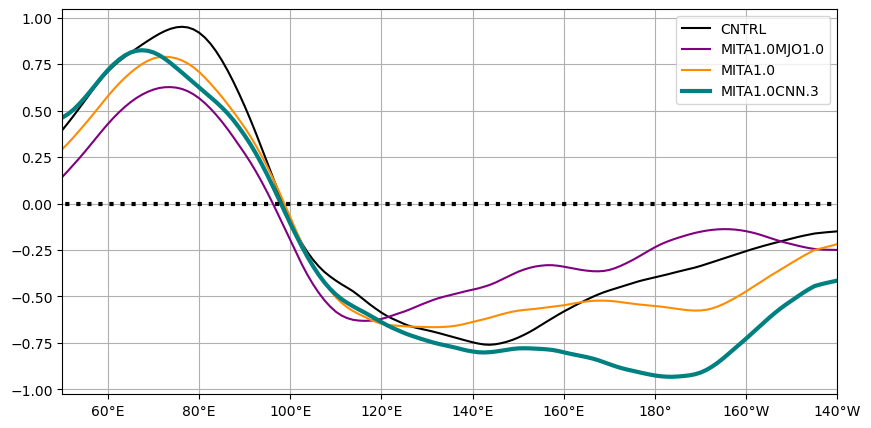

In [74]:
fig = plt.figure(figsize=(10, 5))  # Adjusted figure size for 8 panels
ax = plt.subplot(1, 1, 1)  # Dynamic subplot creation


pCNTRL = dsCNTRL.sel(lat=slice(-10,10),lon=slice(20,220)).mean('lat')
ax.plot(pCNTRL['lon'],pCNTRL['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='k', label='CNTRL')

pCNN = dsCNN.sel(lat=slice(-10,10),lon=slice(20,220)).mean('lat')
ax.plot(pCNN['lon'],pCNN['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='purple', label='MITA1.0MJO1.0')

pMEAN = dsMEAN.sel(lat=slice(-10,10),lon=slice(20,220)).mean('lat')
ax.plot(pMEAN['lon'],pMEAN['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='darkorange', label='MITA1.0')


pFULL = dsFULL.sel(lat=slice(-10,10),lon=slice(20,220)).mean('lat')
ax.plot(pFULL['lon'],pFULL['__xarray_dataarray_variable__'].rolling(lon=10, center=True,min_periods=1).mean().dropna("lon"),color='teal',linewidth=3, label='MITA1.0CNN.3')

ax.grid(True)
ax.plot([10,240],[0,0],color='k',linestyle=':',linewidth=3)
ax.legend()

ax.set_xticks([60, 80, 100, 120, 140, 160, 180, 200,220])
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
ax.set_xlim([50,220])
# ax.set_ylim([-2*1e-7,1*1e-7])

 
plt.show()